In [310]:
import numpy as npy
import pandas as pds

import seaborn as sea
import matplotlib.pyplot as mplt

from sklearn.svm import SVC
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [311]:
dfr = pds.DataFrame (pds.read_csv ('candy-data.csv'))
dfr

competitorname  chocolate  fruity  caramel  peanutyalmondy  \
0                    100 Grand          1       0        1               0   
1                 3 Musketeers          1       0        0               0   
2                     One dime          0       0        0               0   
3                  One quarter          0       0        0               0   
4                    Air Heads          0       1        0               0   
..                         ...        ...     ...      ...             ...   
80                   Twizzlers          0       1        0               0   
81                    Warheads          0       1        0               0   
82        WelchÕs Fruit Snacks          0       1        0               0   
83  WertherÕs Original Caramel          0       0        1               0   
84                    Whoppers          1       0        0               0   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0        0                 1     0    1         0         0.732         0.860   
1        1                 0     0    1         0         0.604         0.511   
2        0                 0     0    0         0         0.011         0.116   
3        0                 0     0    0         0         0.011         0.511   
4        0                 0     0    0         0         0.906         0.511   
..     ...               ...   ...  ...       ...           ...           ...   
80       0                 0     0    0         0         0.220         0.116   
81       0                 0     1    0         0         0.093         0.116   
82       0                 0     0    0         1         0.313         0.313   
83       0                 0     1    0         0         0.186         0.267   
84       0                 1     0    0         1         0.872         0.848   

    winpercent  
0    66.971725  
1    67.602936  
2    32.261086  
3    46.116505  
4    52.341465  
..         ...  
80   45.466282  
81   39.011898  
82   44.375519  
83   41.904308  
84   49.524113  

[85 rows x 13 columns]

In [312]:
dfr.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [313]:
dfr.isna ().sum ()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

<Axes: ylabel='chocolate'>

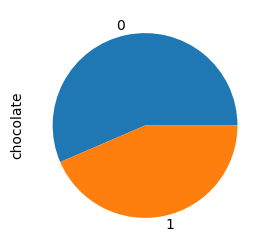

In [314]:
dfr['chocolate'].value_counts ().plot (kind='pie', figsize=(4, 3))

In [315]:
choco = dfr.select_dtypes (include=['int64', 'float64'])
choco

chocolate  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  \
0           1       0        1               0       0                 1   
1           1       0        0               0       1                 0   
2           0       0        0               0       0                 0   
3           0       0        0               0       0                 0   
4           0       1        0               0       0                 0   
..        ...     ...      ...             ...     ...               ...   
80          0       1        0               0       0                 0   
81          0       1        0               0       0                 0   
82          0       1        0               0       0                 0   
83          0       0        1               0       0                 0   
84          1       0        0               0       0                 1   

    hard  bar  pluribus  sugarpercent  pricepercent  winpercent  
0      0    1         0         0.732         0.860   66.971725  
1      0    1         0         0.604         0.511   67.602936  
2      0    0         0         0.011         0.116   32.261086  
3      0    0         0         0.011         0.511   46.116505  
4      0    0         0         0.906         0.511   52.341465  
..   ...  ...       ...           ...           ...         ...  
80     0    0         0         0.220         0.116   45.466282  
81     1    0         0         0.093         0.116   39.011898  
82     0    0         1         0.313         0.313   44.375519  
83     1    0         0         0.186         0.267   41.904308  
84     0    0         1         0.872         0.848   49.524113  

[85 rows x 12 columns]

<Axes: >

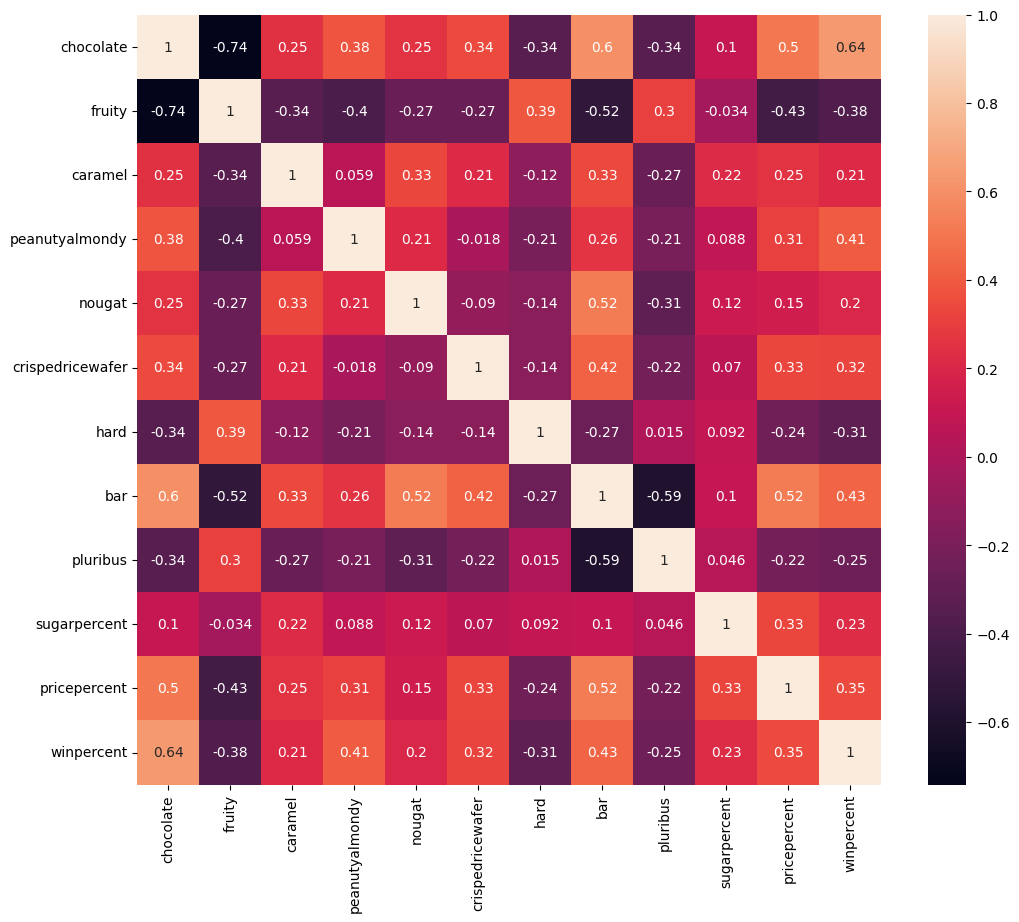

In [316]:
correlation_choco = choco.corr ()['chocolate'].sort_values (ascending=False)[1:]
mplt.figure (figsize=(12, 10))
sea.heatmap (choco.corr (), annot=True)

In [336]:
correlation_choco[abs (correlation_choco) > 0.3]

winpercent          0.636517
bar                 0.597421
pricepercent        0.504675
peanutyalmondy      0.377824
crispedricewafer    0.341210
pluribus           -0.339675
hard               -0.344177
fruity             -0.741721
Name: chocolate, dtype: float64

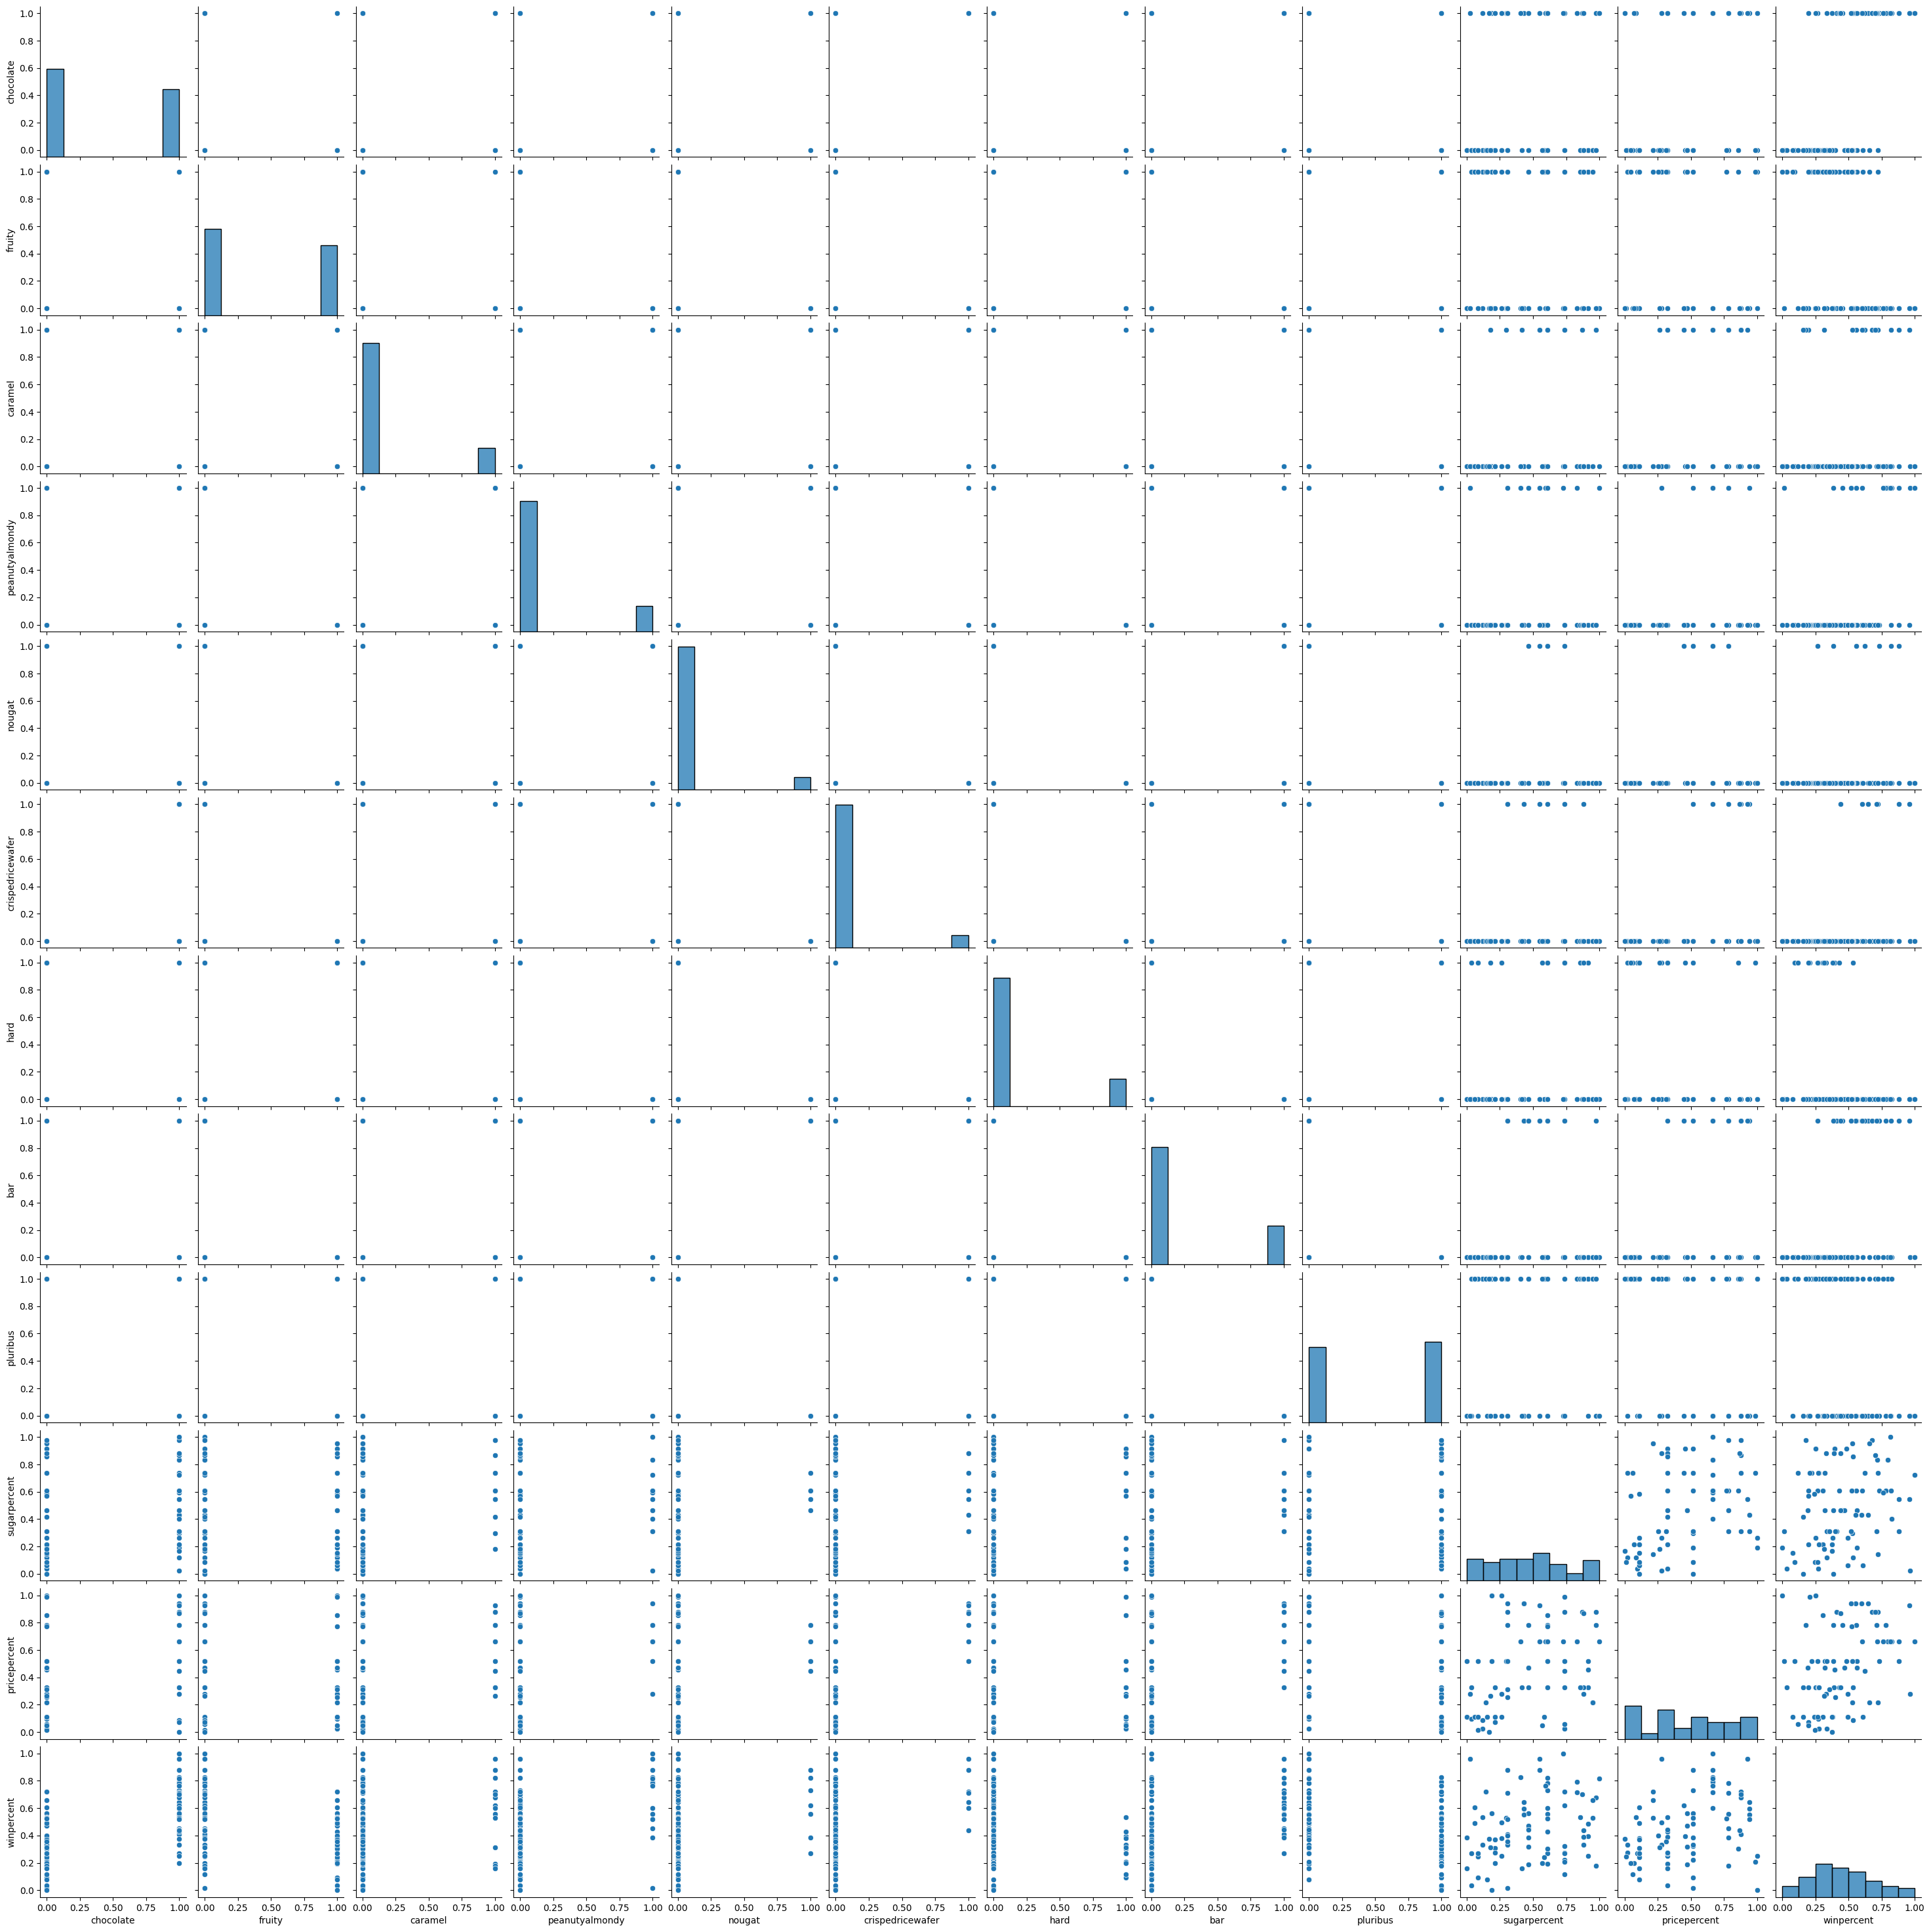

In [337]:
sea.pairplot (choco)

In [387]:
choco.iloc[:, -3:] = MinMaxScaler ().fit_transform (choco.iloc[:, -3:])
choco

chocolate  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  \
0           1       0        1               0       0                 1   
1           1       0        0               0       1                 0   
2           0       0        0               0       0                 0   
3           0       0        0               0       0                 0   
4           0       1        0               0       0                 0   
..        ...     ...      ...             ...     ...               ...   
80          0       1        0               0       0                 0   
81          0       1        0               0       0                 0   
82          0       1        0               0       0                 0   
83          0       0        1               0       0                 0   
84          1       0        0               0       0                 1   

    hard  bar  pluribus  sugarpercent  pricepercent  winpercent  
0      0    1         0      0.737973      0.879793    0.721251  
1      0    1         0      0.606960      0.518135    0.731475  
2      0    0         0      0.000000      0.108808    0.158998  
3      0    0         0      0.000000      0.518135    0.383432  
4      0    0         0      0.916070      0.518135    0.484266  
..   ...  ...       ...           ...           ...         ...  
80     0    0         0      0.213920      0.108808    0.372900  
81     1    0         0      0.083930      0.108808    0.268350  
82     0    0         1      0.309110      0.312953    0.355231  
83     1    0         0      0.179120      0.265285    0.315202  
84     0    0         1      0.881269      0.867357    0.438630  

[85 rows x 12 columns]

In [374]:
X = pds.DataFrame (MinMaxScaler ().fit_transform (choco.drop ('bar', axis=1)))
yhat = choco['bar']

In [384]:
X_train, X_test, y_train, y_test = train_test_split (X, yhat, test_size=0.2)

In [385]:
model = SVC ()
model.fit (X_train, y_train)

SVC()

In [386]:
y_pred = model.predict (X_test)
model.score (X_test, y_test)

0.9411764705882353